In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Loading the dataset with predicted and manually annotated sentiment scores
df = pd.read_csv('/content/new_manual_validation2_sample.csv')

# Specifying columns containing predicted and manually annotated sentiment scores
predicted_column = 'predicted_sentiment'
manual_column = 'validation_scores'

# Converting the sentiment scores to integers
df[predicted_column] = df[predicted_column].astype(int)
df[manual_column] = df[manual_column].astype(int)

# Calculating metrics
accuracy = accuracy_score(df[manual_column], df[predicted_column])
precision = precision_score(df[manual_column], df[predicted_column], average='weighted')
recall = recall_score(df[manual_column], df[predicted_column], average='weighted')
f1 = f1_score(df[manual_column], df[predicted_column], average='weighted')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(df[manual_column], df[predicted_column])
class_report = classification_report(df[manual_column], df[predicted_column])

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Printing confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.46
Precision: 0.46418325791855203
Recall: 0.46
F1 Score: 0.456423011239525
Confusion Matrix:
[[ 0  5  0  1  1]
 [ 1  3 11  3  1]
 [ 0  9 35  9  4]
 [ 0  0  5  6  2]
 [ 0  0  1  1  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.18      0.16      0.17        19
           2       0.67      0.61      0.64        57
           3       0.30      0.46      0.36        13
           4       0.20      0.50      0.29         4

    accuracy                           0.46       100
   macro avg       0.27      0.35      0.29       100
weighted avg       0.46      0.46      0.46       100



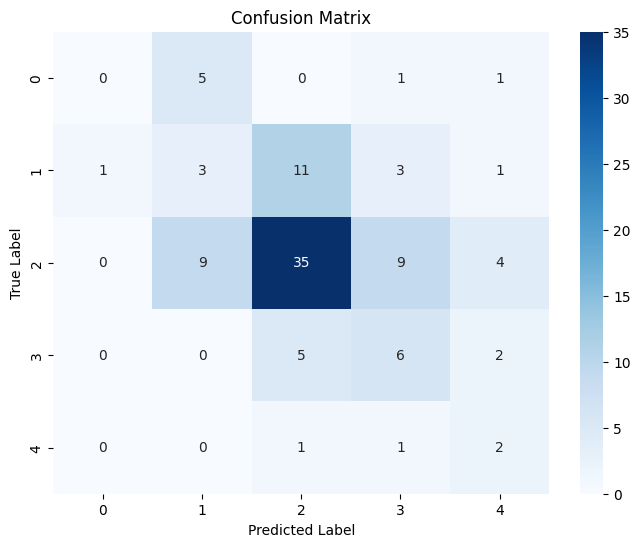

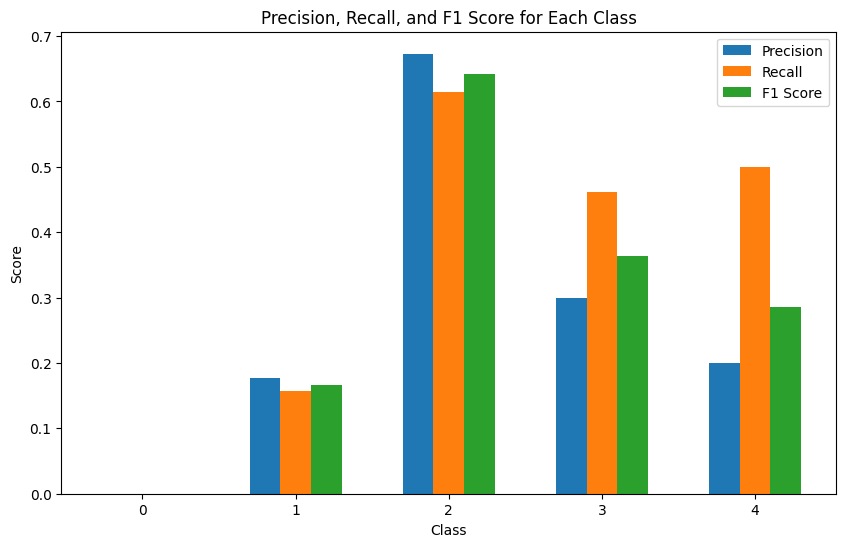

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


true_labels = df['validation_scores'].astype(int)
predicted_labels = df['predicted_sentiment'].astype(int)

# Confusion Matrix Heatmap
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision, Recall, and F1 Score Bar Chart
metrics = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(5)], output_dict=True)
precision = [metrics[str(i)]['precision'] for i in range(5)]
recall = [metrics[str(i)]['recall'] for i in range(5)]
f1 = [metrics[str(i)]['f1-score'] for i in range(5)]

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(5)
plt.bar(index, precision, width=bar_width, label='Precision')
plt.bar([i + bar_width for i in index], recall, width=bar_width, label='Recall')
plt.bar([i + 2 * bar_width for i in index], f1, width=bar_width, label='F1 Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for Each Class')
plt.xticks([i + bar_width for i in index], [str(i) for i in range(5)])
plt.legend()
plt.show()



In [ ]:
import numpy as np


# Calculating the number of agreements
num_agreements = np.trace(cm)

# Calculating the total number of instances
total_instances = np.sum(cm)

# Calculating the agreement rate
agreement_rate = (num_agreements / total_instances) * 100

print(f"Agreement Rate: {agreement_rate:.2f}%")


Agreement Rate: 46.00%


In [ ]:
# Filtering the instances with disagreements
disagreements = df[df['predicted_sentiment'] != df['validation_scores']]

# Analyzing the distribution of disagreements
disagreement_distribution = disagreements['validation_scores'].value_counts()
print(disagreement_distribution)

2    22
1    16
0     7
3     7
4     2
Name: validation_scores, dtype: int64


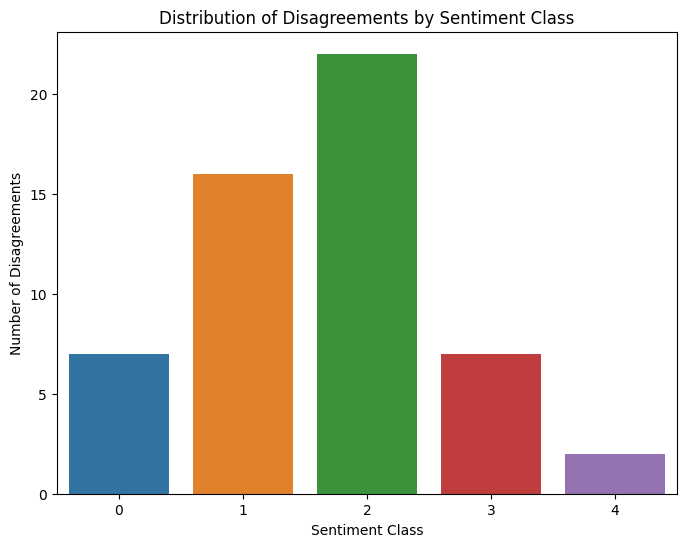

In [ ]:

# Visualizing the distribution of disagreements with a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=disagreement_distribution.index, y=disagreement_distribution.values)
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Disagreements')
plt.title('Distribution of Disagreements by Sentiment Class')
plt.show()


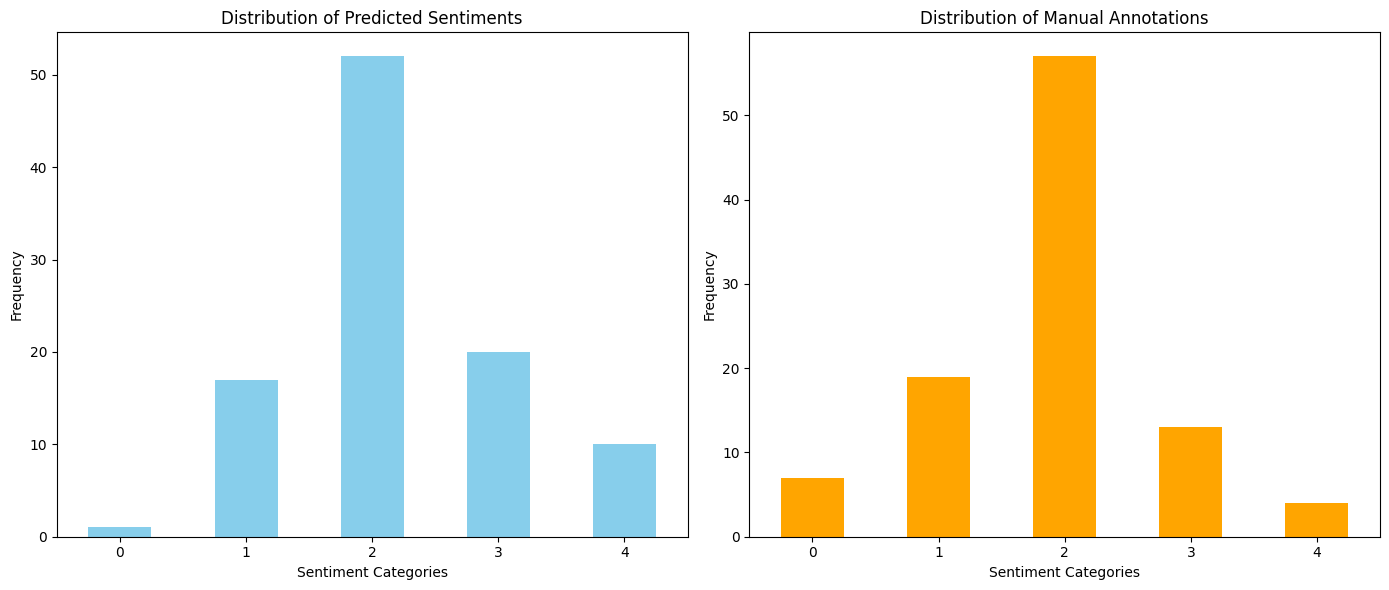

In [ ]:
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Defining the order for the x-axis ticks (assuming a 5-point scale)
sentiment_order = [0, 1, 2, 3, 4]

# Bar chart for model's predictions
plt.subplot(1, 2, 1)
df['predicted_sentiment'].astype(int).value_counts().sort_index().loc[sentiment_order].plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Bar chart for manual annotations
plt.subplot(1, 2, 2)
df['validation_scores'].astype(int).value_counts().sort_index().loc[sentiment_order].plot(kind='bar', color='orange')
plt.title('Distribution of Manual Annotations')
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# Filtering the instances with disagreements where manual label is 2
filtered_disagreements = df[(df['predicted_sentiment'].isin([1, 3])) & (df['validation_scores'] == 2)]

# Analyzing the distribution of disagreements
disagreement_distribution = filtered_disagreements['validation_scores'].value_counts()
print(disagreement_distribution)


2    18
Name: validation_scores, dtype: int64
